In [17]:
import pandas as pd
import yfinance as yf

# Download historical data
tckr = str(input("Enter your Ticker: "))
tckr = tckr.upper()
df = yf.download(tckr, start='2020-01-01', end='2025-12-31')

# Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [18]:
# Shift 'High' to create the next day's price as the target
df['Next_High'] = df['High'].shift(-1).fillna(df['Close'])

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_High']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [20]:
df['Predicted_High'] = model.predict(X)

Mean Squared Error: 0.05


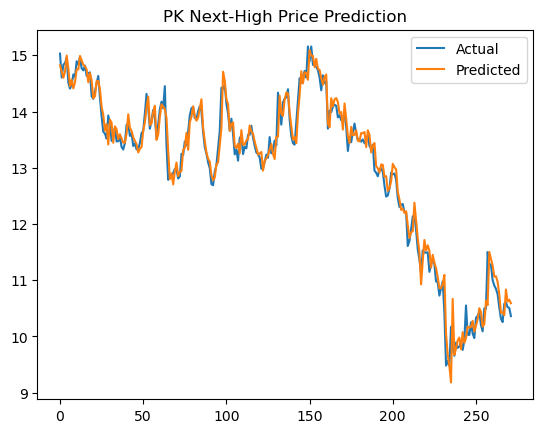

In [21]:
import matplotlib.pyplot as plt

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs. predicted
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{tckr} Next-High Price Prediction')
plt.legend()
plt.show()

In [22]:
y_test

Date
2024-04-30    15.029956
2024-05-01    14.605687
2024-05-02    14.831362
2024-05-03    14.862957
2024-05-06    14.957739
                ...    
2025-05-23    10.580000
2025-05-27    10.600000
2025-05-28    10.520000
2025-05-29    10.505000
2025-05-30    10.360000
Name: Next_High, Length: 272, dtype: float64

In [23]:
y_pred

array([14.82141611, 14.71159356, 14.59931963, 14.71018746, 14.99597523,
       14.76741281, 14.4499916 , 14.565614  , 14.41146241, 14.5183016 ,
       14.74952679, 14.74719581, 14.98980922, 14.90745898, 14.83170351,
       14.80445076, 14.74749338, 14.51921484, 14.68404945, 14.55534759,
       14.23608772, 14.27120881, 14.53915489, 14.54514996, 14.39642634,
       14.08127016, 13.93794596, 13.6583947 , 13.77690086, 13.41300806,
       13.85449389, 13.80284318, 13.44423449, 13.73597143, 13.68414627,
       13.50646427, 13.5954671 , 13.51935859, 13.44531982, 13.44635047,
       13.60656403, 13.9498147 , 13.70986592, 13.65297875, 13.54412437,
       13.47729414, 13.4212472 , 13.2723548 , 13.33778547, 13.36775895,
       13.65938161, 13.80517164, 14.0698279 , 14.26439853, 13.7602178 ,
       13.78599109, 13.9892184 , 14.10127361, 13.49348475, 13.58877278,
       13.90301432, 14.12804989, 14.08350854, 14.04189892, 13.88568183,
       13.30509057, 12.79668869, 12.89875804, 12.70466506, 12.93

In [24]:
df

Price,Open,High,Low,Close,Volume,Next_High,Predicted_High
Ticker,PK,PK,PK,PK,PK,,
Date,,,,,,,
2020-01-02,18.614989,18.614989,18.063911,18.071068,2026400,18.146220,18.283615
2020-01-03,17.892151,18.146220,17.820582,18.114014,2524300,18.013815,18.335253
2020-01-06,17.942246,18.013815,17.691756,17.706070,1641900,17.634500,17.897745
2020-01-07,17.591559,17.634500,17.348226,17.412638,2360600,17.498522,17.608072
2020-01-08,17.391168,17.498522,17.298129,17.477051,2611400,17.527150,17.672491
...,...,...,...,...,...,...,...
2025-05-23,10.020000,10.255000,9.980000,10.170000,3776700,10.580000,10.377300
2025-05-27,10.370000,10.580000,10.165000,10.560000,6929400,10.600000,10.833592
